## Limit of Diversification 


In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

In [2]:
ind_return = erk.get_ind_returns()
ind_nfrims = pd.read_csv("C:/Users/Younes/PycharmProjects/finance-courses/data/ind30_m_nfirms.csv", header=0, index_col=0, parse_dates=True)
ind_size = pd.read_csv("C:/Users/Younes/PycharmProjects/finance-courses/data/ind30_m_size.csv", header=0, index_col=0, parse_dates=True)
ind_return.index = pd.to_datetime(ind_return.index, format="%Y%m").to_period("M")
ind_nfrims.index = pd.to_datetime(ind_nfrims.index, format="%Y%m").to_period("M")
ind_size.index = pd.to_datetime(ind_size.index, format="%Y%m").to_period("M")

<AxesSubplot:>

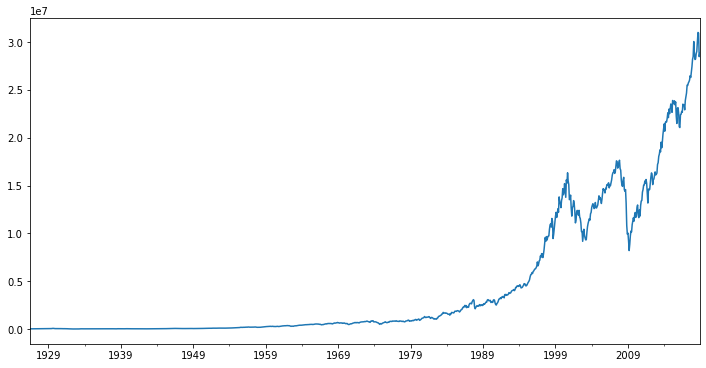

In [3]:
ind_mktcap = ind_nfrims * ind_size
total_mktcap = ind_mktcap.sum(axis="columns")
total_mktcap.plot(figsize=(12, 6))


In [4]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")
ind_capweight["1926"].sum(axis="columns")
ind_capweight.head

<ipython-input-4-bc31396ab9cc>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ind_capweight["1926"].sum(axis="columns")


<bound method NDFrame.head of             Food      Beer      Smoke     Games     Books     Hshld     Clths  \
1926-07  0.058037  0.000801  0.035844  0.006935  0.000902  0.006683  0.008265   
1926-08  0.056578  0.000738  0.035264  0.006932  0.000972  0.006453  0.008673   
1926-09  0.056699  0.000917  0.036510  0.006810  0.001046  0.006038  0.008249   
1926-10  0.056920  0.000954  0.036736  0.007175  0.001028  0.006053  0.008139   
1926-11  0.056725  0.000951  0.038285  0.007047  0.001161  0.005924  0.008396   
...           ...       ...       ...       ...       ...       ...       ...   
2018-08  0.021873  0.008309  0.008222  0.011997  0.001168  0.014569  0.009720   
2018-09  0.021005  0.007873  0.007515  0.011923  0.001076  0.014427  0.009874   
2018-10  0.020661  0.007862  0.007831  0.011851  0.001052  0.014606  0.010000   
2018-11  0.022649  0.008403  0.009178  0.010810  0.001066  0.015702  0.009761   
2018-12  0.022832  0.008763  0.008291  0.010589  0.001083  0.016477  0.009510  

<AxesSubplot:>

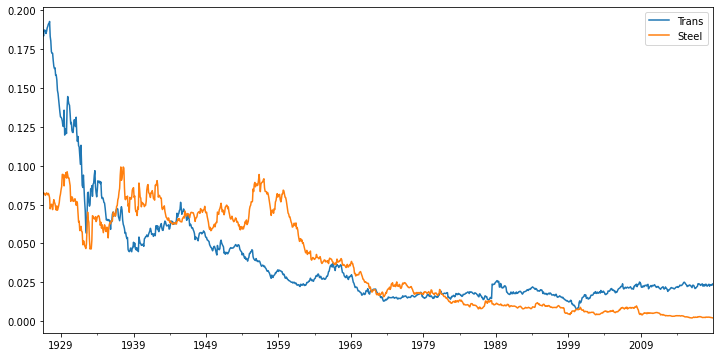

In [5]:
ind_capweight[["Trans", "Steel"]].plot(figsize=(12, 6))

In [6]:
total_market_return = (ind_capweight* ind_return).sum(axis="columns")

<AxesSubplot:>

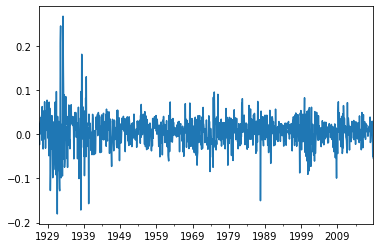

In [7]:
total_market_return.plot()

<AxesSubplot:title={'center':'total market return marketcap weight'}>

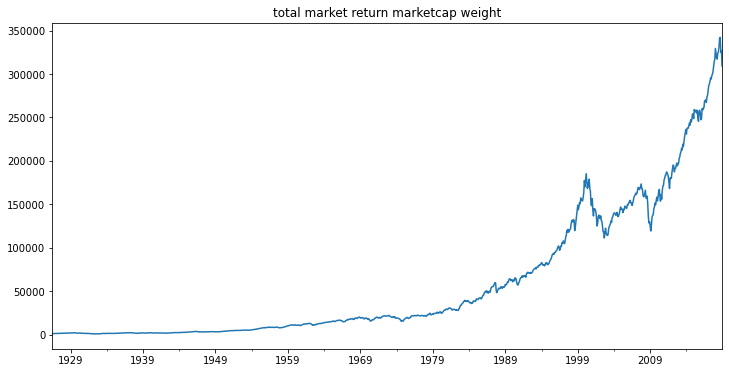

In [8]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(12, 6), title="total market return marketcap weight")

<AxesSubplot:>

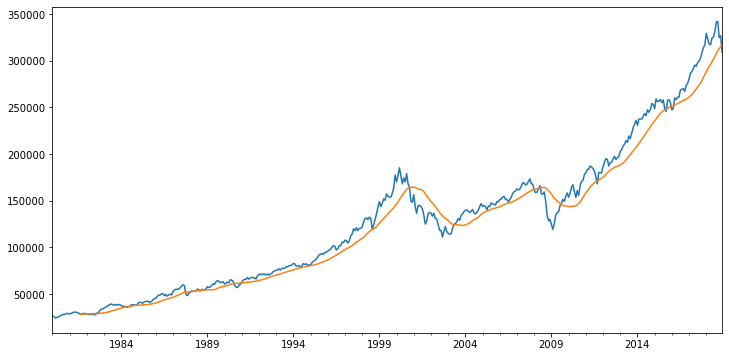

In [9]:
total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=21).mean().plot(figsize=(12,6))

In [10]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)

<AxesSubplot:>

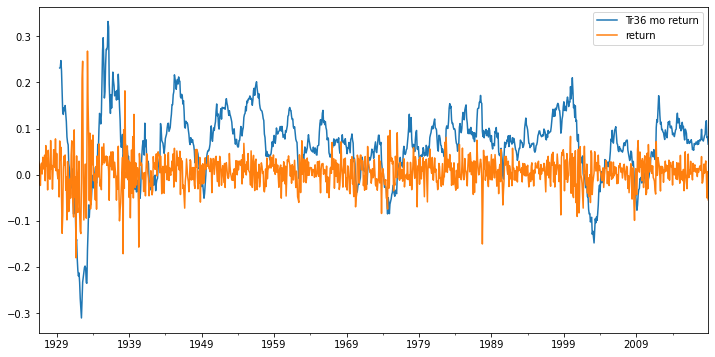

In [11]:
tmi_tr36rets.plot(figsize=(12,6), legend=True, label="Tr36 mo return")
total_market_return.plot(label="return", legend=True)

In [12]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [42]:
ind_tr36corr = ts_corr.groupby(level="date").apply(lambda cormat: cormat.values.mean())

KeyError: 'Level date not found'

## emplemnting portfolio Insurance (CPPI)

In [13]:
tmi_return = total_market_index

In [14]:
risky_r = ind_return["2000":][["Steel", "Fin", "Beer"]]

In [15]:
#safe asset 
safe_r = pd.DataFrame().reindex_like(risky_r)

In [16]:
safe_r.shape

(228, 3)

In [17]:
safe_r[:] = .03/12
start = 1000
floor =0.8 

1. Cushion - (Asset Value minus Floor value)
2. Compute an allocation to safe and risky asset --> m + risk_budget 
3. recompute the asset value based on the returns 


In [18]:
def compound1(r):
    return (1+r).prod()-1
def compound2(r):
    return np.expm1(np.log1p(r).sum())

In [19]:
compound1(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [20]:
compound2(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [21]:
%timeit compound1(risky_r)

862 µs ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
%timeit compound2(risky_r)

885 µs ± 100 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## back to CPPI

In [22]:
dates = risky_r.index
n_steps = len(dates)
account_value = start 
floor_value = start * floor
m = 3 

account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion = (account_value - floor_value) / account_value
    risky_w = m * cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1 - risky_w
    risky_alloc = account_value * risky_w
    safe_alloc = account_value * safe_w
    ## update the account value for this time step
    account_value = (risky_alloc * (1 + risky_r.iloc[step])) + (safe_alloc * (1 + safe_r.iloc[step]))
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value



In [23]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


In [24]:
risky_wealth = start * (1+ risky_r).cumprod()

<AxesSubplot:>

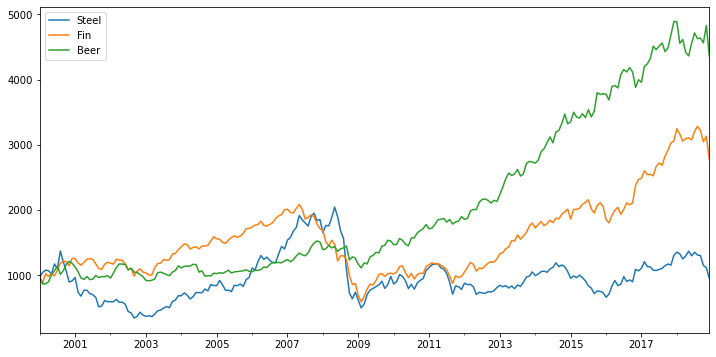

In [26]:
risky_wealth.plot(figsize=(12,6))

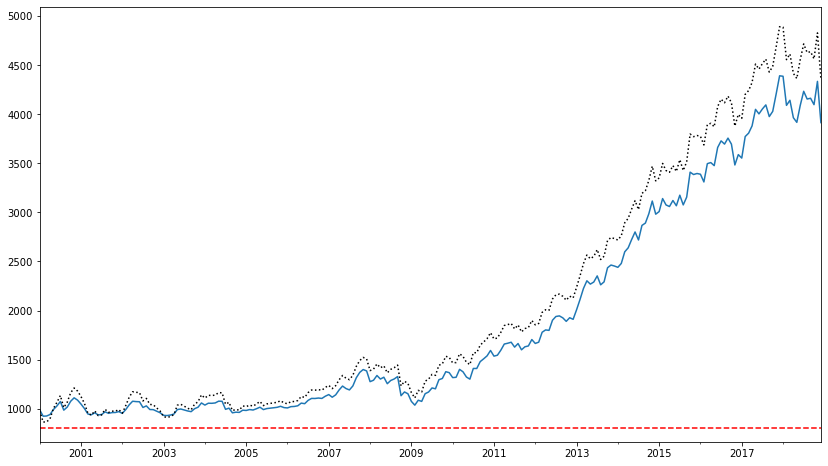

In [29]:
ax = account_history["Beer"].plot(figsize=(14,8))
risky_wealth["Beer"].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle="--")

<AxesSubplot:>

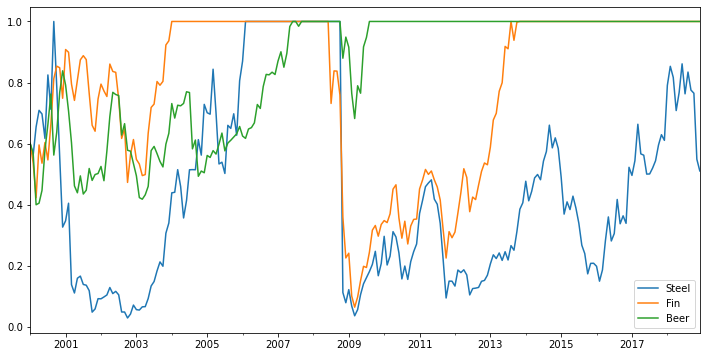

In [30]:
risky_w_history.plot(figsize=(12,6))

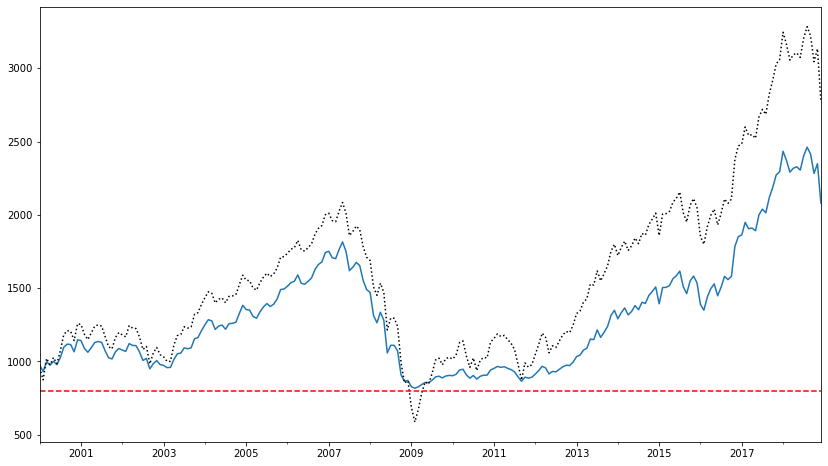

In [31]:
ind = "Fin"
ax = account_history[ind].plot(figsize=(14,8))
risky_wealth[ind].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle="--")


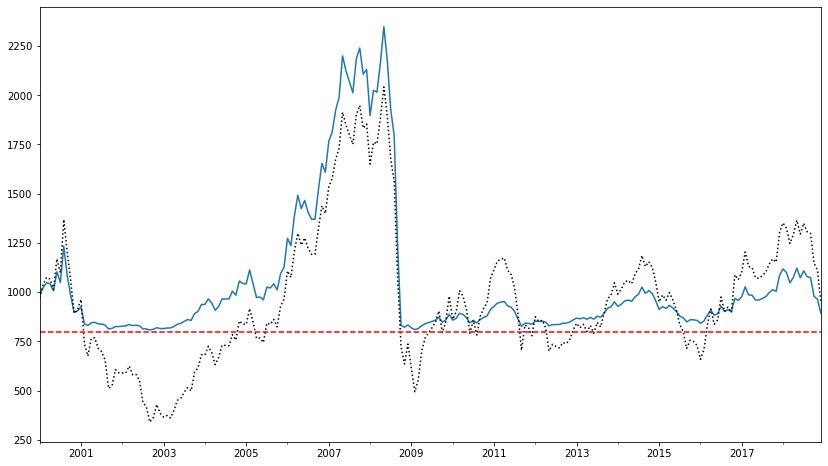

In [33]:
ind = "Steel"
ax = account_history[ind].plot(figsize=(14,8))
risky_wealth[ind].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle="--")

In [34]:
erk.summary_stats(risky_r)

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
Steel,-0.002790,0.312368,-0.102567,-0.326334,4.144381,0.208117,0.150139,-0.758017
Fin,0.055166,0.192909,0.126718,-0.533218,4.995534,0.132175,0.091224,-0.718465
Beer,0.080598,0.138925,0.354314,-0.493545,4.173881,0.091442,0.063015,-0.271368


In [37]:
btr = erk.cppi(risky_r)
btr

{'Risky wealth':                Steel          Fin         Beer
 2000-01   972.300000   955.800000   977.200000
 2000-02  1038.805320   874.652580   863.453920
 2000-03  1075.059626  1020.632096   864.576410
 2000-04  1066.029125   977.255232   896.392822
 2000-05  1013.580492  1026.704346  1002.794650
 ...              ...          ...          ...
 2018-08  1306.624224  3283.129665  4629.014147
 2018-09  1297.869842  3219.765263  4637.809274
 2018-10  1147.187153  3044.288056  4564.995669
 2018-11  1112.771539  3132.267981  4829.308918
 2018-12   948.303905  2773.936524  4361.348884
 
 [228 rows x 3 columns],
 'CPPI wealth':                Steel          Fin         Beer
 2000-01   984.380000   974.480000   987.320000
 2000-02  1023.292876   931.167544   922.971256
 2000-03  1047.555176   998.187296   924.835988
 2000-04  1042.079009   973.927479   939.993701
 2000-05  1007.137753  1001.460033   991.145489
 ...              ...          ...          ...
 2018-08  1078.784329  2461.73

In [41]:
erk.summary_stats(btr["Risky wealth"].pct_change().dropna())

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
Steel,-0.001320,0.312973,-0.097801,-0.330333,4.132666,0.208117,0.150415,-0.758017
Fin,0.057941,0.192986,0.140661,-0.543630,5.015294,0.132175,0.091172,-0.718465
Beer,0.082286,0.139058,0.365788,-0.502368,4.181533,0.091442,0.063037,-0.271368


In [50]:
btr = erk.cppi(tmi_return["2007":])
# ax = btr["Risky return"].plot(figsize=(12,6), legend=False)
# btr["Risky return"].plot(ax=ax, style="k:")


TypeError: Index(...) must be called with a collection of some kind, 'Risky return' was passed

In [51]:
erk.summary_stats(btr["Risky wealth"].pct_change().dropna())

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
Steel,-0.001320,0.312973,-0.097801,-0.330333,4.132666,0.208117,0.150415,-0.758017
Fin,0.057941,0.192986,0.140661,-0.543630,5.015294,0.132175,0.091172,-0.718465
Beer,0.082286,0.139058,0.365788,-0.502368,4.181533,0.091442,0.063037,-0.271368


# drawdown constraint

In [53]:
btr = erk.cppi(ind_return["2007":][["Steel", "Fin", "Beer"]], drawdown= 0.25)

<AxesSubplot:>

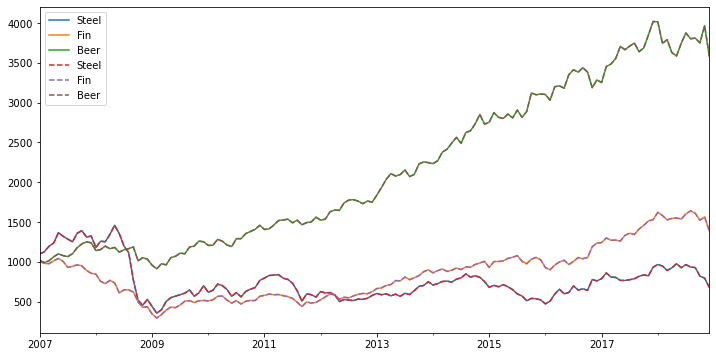

In [59]:
ax = btr["Risky wealth"].plot(figsize=(12, 6))
btr["Risky wealth"].plot(ax=ax , style="--")

In [3]:
import ipywidgets as widgets 

In [4]:
def squareit(n):
    return n*n
    

In [5]:
squareit(5)

25

In [6]:
widgets.interact(squareit, n=(0,100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squareit(n)>